LGMVIP-DataScience Internship - February 2022

Beginner level-TASK-1 Iris Flowers Classification ML Project

Author-Rohith Kumar.M

Importing Libraries

In [1]:
import pandas as pd  
import numpy as np 
import os 
from google.colab import files
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

Loading the DataSet

In [2]:
data_iris=pd.read_csv("Iris.csv")

Summarizing Dataset

In [3]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Processing the dataset

In [8]:
data_iris.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [9]:
data_iris.shape

(150, 6)

Data Visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2301a22d0>,
      dtype=object)

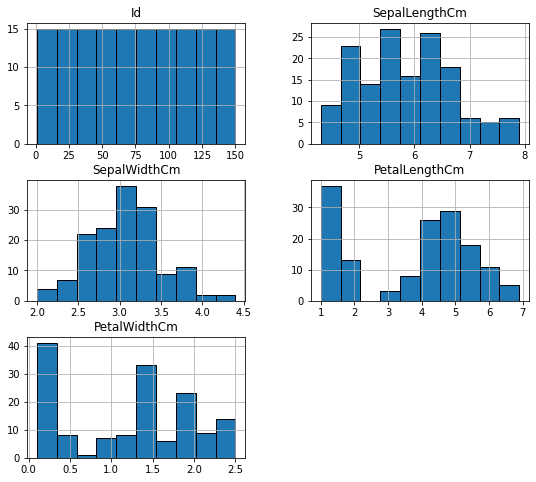

In [10]:
data_iris.hist(edgecolor='Black',figsize=(9,8))

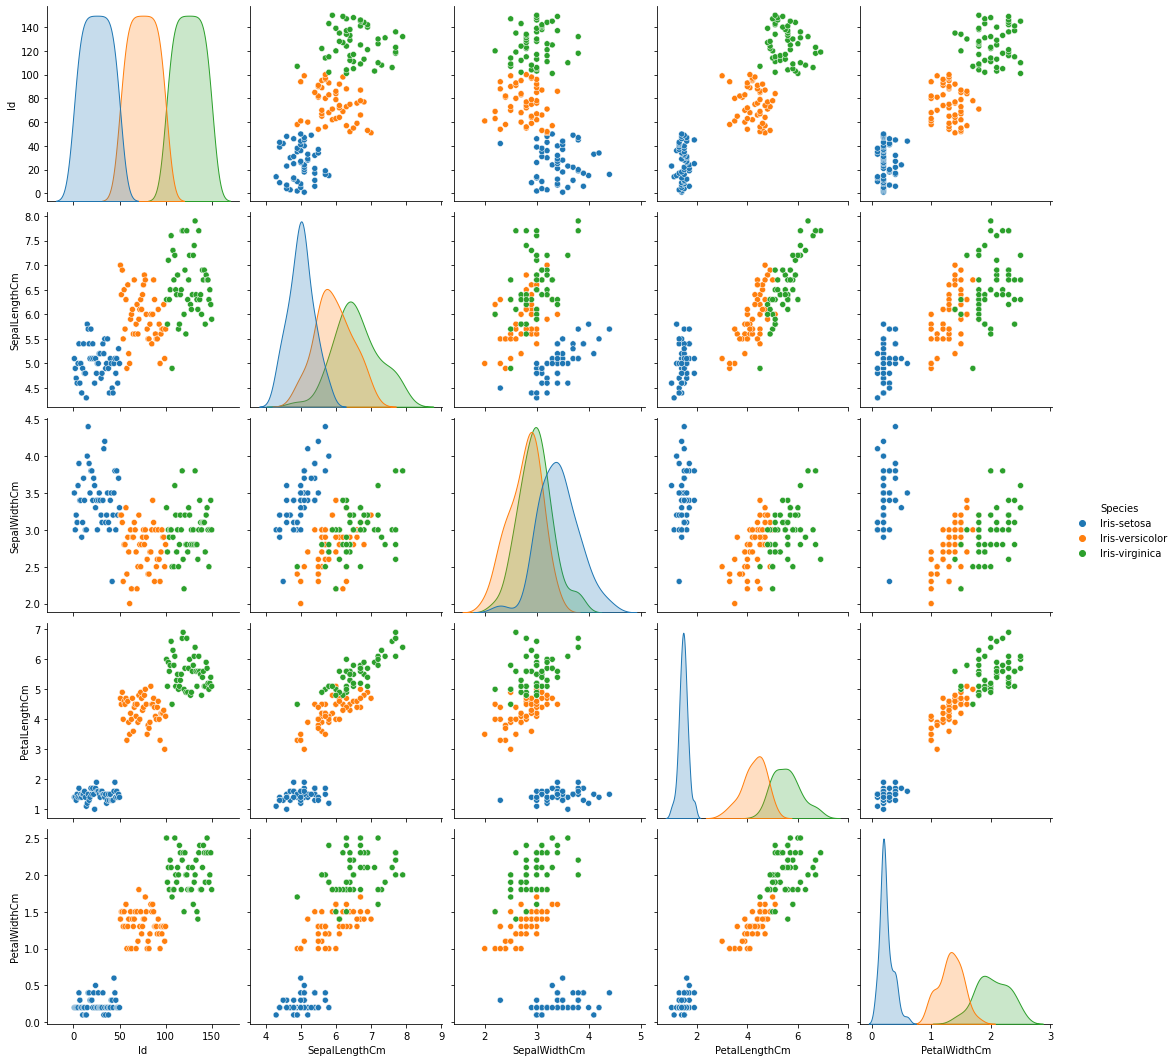

In [11]:
sns.pairplot(data_iris,hue='Species',height=3,aspect=1)

In [12]:
data_iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


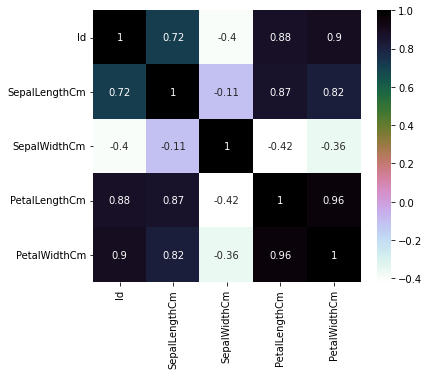

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(data_iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [17]:
fig = px.scatter(data_iris, x="SepalLengthCm", y="SepalWidthCm", color="Species")
fig.show()

Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [19]:
data_iris['Species']=label.fit_transform(data_iris['Species'])
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Training the Model

In [20]:
X=data_iris.drop(columns=['Species'])
y=data_iris['Species']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [21]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

Evaluating the Model

In [22]:
from sklearn.metrics import accuracy_score
predictions = svn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions))

Accuracy: 0.9777777777777777


Classification Report

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

